In [5]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('./new-york-city-transport-statistics'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./new-york-city-transport-statistics\mta_1706.csv
./new-york-city-transport-statistics\mta_1708.csv
./new-york-city-transport-statistics\mta_1710.csv
./new-york-city-transport-statistics\mta_1712.csv


In [13]:
import pandas as pd
import os

folder_path = './new-york-city-transport-statistics'
csv_files = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path) if filename.endswith('.csv')]

df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file, on_bad_lines='skip', low_memory=False)  
        df_list.append(df)
        print(f"Loaded {file} with {df.shape[0]} rows and {df.shape[1]} columns")
    except Exception as e:
        print(f"Error reading {file}: {e}")

merged_df = pd.concat(df_list, ignore_index=True)

merged_df.to_csv('full.csv', index=False)
print("full.csv'.")


Loaded ./new-york-city-transport-statistics\mta_1706.csv with 6730436 rows and 17 columns
Loaded ./new-york-city-transport-statistics\mta_1708.csv with 6463520 rows and 17 columns
Loaded ./new-york-city-transport-statistics\mta_1710.csv with 6865376 rows and 17 columns
Loaded ./new-york-city-transport-statistics\mta_1712.csv with 6461384 rows and 17 columns
full.csv'.


In [6]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('full.csv')

In [8]:
columns_needed = [
    "RecordedAtTime", "DirectionRef", "PublishedLineName", "DestinationName",
    "NextStopPointName", "DistanceFromStop", "ExpectedArrivalTime", "ScheduledArrivalTime"
]

df = df[df["ArrivalProximityText"] == "at stop"]

df = df[columns_needed]

In [9]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
2,2017-06-01 00:03:49,0.0,Bx10,RIVERDALE 263 ST,HENRY HUDSON PKY E/W 235 ST,5.0,2017-06-01 00:03:56,24:00:53
4,2017-06-01 00:03:22,1.0,Bx1,MOTT HAVEN 136 ST via CONCOURSE,GRAND CONCOURSE/E 196 ST,11.0,2017-06-01 00:03:56,23:59:38
6,2017-06-01 00:03:24,0.0,B31,MIDWOOD KINGS HWY STA,GERRITSEN AV/GERRITSEN BEACH,0.0,NaN,24:08:00
11,2017-06-01 00:03:52,1.0,B1,MANHATTAN BEACH KINGSBORO CC,86 ST/BAY PY,22.0,2017-06-01 00:03:57,24:05:55
20,2017-06-01 00:03:41,0.0,B6,EAST NY NEW LOTS STA,GLENWOOD RD/E 98 ST,4.0,2017-06-01 00:03:56,24:05:00


In [10]:
df = df.dropna()

In [11]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
2,2017-06-01 00:03:49,0.0,Bx10,RIVERDALE 263 ST,HENRY HUDSON PKY E/W 235 ST,5.0,2017-06-01 00:03:56,24:00:53
4,2017-06-01 00:03:22,1.0,Bx1,MOTT HAVEN 136 ST via CONCOURSE,GRAND CONCOURSE/E 196 ST,11.0,2017-06-01 00:03:56,23:59:38
11,2017-06-01 00:03:52,1.0,B1,MANHATTAN BEACH KINGSBORO CC,86 ST/BAY PY,22.0,2017-06-01 00:03:57,24:05:55
20,2017-06-01 00:03:41,0.0,B6,EAST NY NEW LOTS STA,GLENWOOD RD/E 98 ST,4.0,2017-06-01 00:03:56,24:05:00
21,2017-06-01 00:03:36,0.0,B4,SHEEPSHEAD BAY KNAPP ST,SHORE PKY/BROWN ST,25.0,2017-06-01 00:03:56,24:01:49


In [12]:
import pandas as pd

def parse_scheduled_time(row):
    rec_time = row['RecordedAtTime']
    base_date = rec_time.date()
    scheduled_str = row['ScheduledArrivalTime']
    
    hour, minute, second = map(int, scheduled_str.split(':'))
    
    if hour >= 24:
        hour -= 24
    scheduled_dt = pd.Timestamp(base_date) + pd.Timedelta(hours=hour, minutes=minute, seconds=second)
    
    diff = scheduled_dt - rec_time
    if diff.total_seconds() > 12 * 3600:
        scheduled_dt -= pd.Timedelta(days=1)
    
    return scheduled_dt

# Convert RecordedAtTime and ExpectedArrivalTime to datetime
df['RecordedAtTime'] = pd.to_datetime(df['RecordedAtTime'], errors='coerce')
df['ExpectedArrivalTime'] = pd.to_datetime(df['ExpectedArrivalTime'], errors='coerce')

# Parse ScheduledArrivalTime
df['ScheduledArrivalTime_dt'] = df.apply(parse_scheduled_time, axis=1)

# Compute Delay in minutes
df['Delay'] = (df['ExpectedArrivalTime'] - df['ScheduledArrivalTime_dt']).dt.total_seconds() / 60  

print("Delay calculation complete.")


Delay calculation complete.


In [13]:
df = df.drop(columns=['ExpectedArrivalTime', 'ScheduledArrivalTime', 'ScheduledArrivalTime_dt'])


In [14]:
df.head()

,RecordedAtTime,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay
2,2017-06-01 00:03:49,0.0,Bx10,RIVERDALE 263 ST,HENRY HUDSON PKY E/W 235 ST,5.0,3.050000
4,2017-06-01 00:03:22,1.0,Bx1,MOTT HAVEN 136 ST via CONCOURSE,GRAND CONCOURSE/E 196 ST,11.0,4.300000
11,2017-06-01 00:03:52,1.0,B1,MANHATTAN BEACH KINGSBORO CC,86 ST/BAY PY,22.0,-1.966667
20,2017-06-01 00:03:41,0.0,B6,EAST NY NEW LOTS STA,GLENWOOD RD/E 98 ST,4.0,-1.066667
21,2017-06-01 00:03:36,0.0,B4,SHEEPSHEAD BAY KNAPP ST,SHORE PKY/BROWN ST,25.0,2.116667


In [15]:
import pandas as pd

df['Day'] = df['RecordedAtTime'].dt.day_name()
df['DayType'] = df['RecordedAtTime'].dt.weekday.apply(lambda x: 'weekend' if x >= 5 else 'workday')

def rush_hour_status(time):
    hour = time.hour
    return 1 if (6 <= hour < 10) or (15 <= hour < 19) else 0

df['RushHour'] = df['RecordedAtTime'].dt.time.apply(rush_hour_status)

df['FarStatus'] = df['DistanceFromStop'].apply(lambda x: 1 if x > 200 else 0)

print("New features added: Day, DayType, RushHour, and FarStatus.")


New features added: Day, DayType, RushHour, and FarStatus.


In [18]:
rush_hour_counts = df['RushHour'].value_counts(normalize=True) * 100
print("Rush Hour Distribution:\n", rush_hour_counts)


Rush Hour Distribution:
 RushHour
0    52.91126
1    47.08874
Name: proportion, dtype: float64


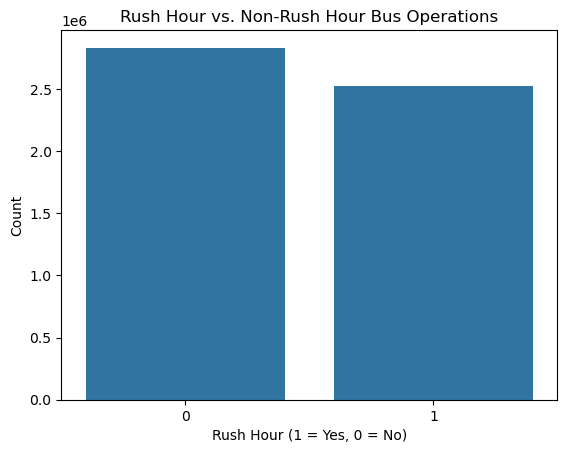

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['RushHour'])
plt.title('Rush Hour vs. Non-Rush Hour Bus Operations')
plt.xlabel('Rush Hour (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [20]:
daytype_counts = df['DayType'].value_counts(normalize=True) * 100
print("Workday vs. Weekend Distribution:\n", daytype_counts)


Workday vs. Weekend Distribution:
 DayType
workday    77.132749
weekend    22.867251
Name: proportion, dtype: float64


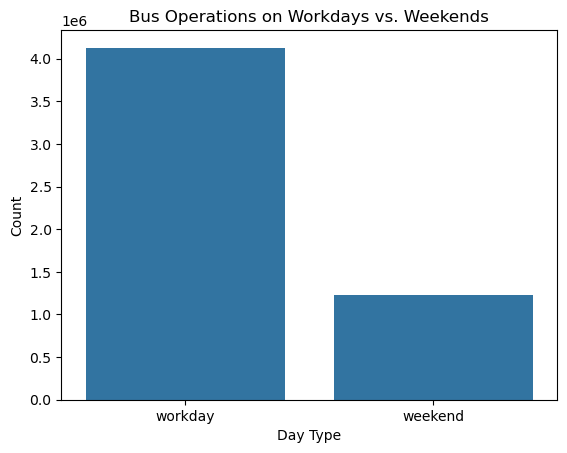

In [21]:
sns.countplot(x=df['DayType'])
plt.title('Bus Operations on Workdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.show()


In [25]:
df = df.drop(columns=['Day'])

In [26]:
df = df.drop(columns=['FarStatus'])

In [28]:
from sklearn.model_selection import train_test_split

df_sampled, _ = train_test_split(df, test_size=0.9, stratify=df['DayType'], random_state=42)


In [38]:
df_sampled.shape

(535319, 9)

In [144]:
for col in ['PublishedLineName', 'DestinationName', 'NextStopPointName']:
    freq_map = df[col].value_counts(normalize=True)  # Get frequency of each category
    df[col] = df[col].map(freq_map)


In [149]:
df.to_csv("busbus.csv", index=False)


In [151]:
bus_sample = pd.read_csv("busbus.csv")
nyc_weather = pd.read_csv("NYC_Weather_2016_2022.csv", on_bad_lines='skip')

bus_sample['RecordedAtTime'] = pd.to_datetime(bus_sample['RecordedAtTime'], errors='coerce')
nyc_weather.rename(columns={'time': 'WeatherDatetime'}, inplace=True)
nyc_weather['WeatherDatetime'] = pd.to_datetime(nyc_weather['WeatherDatetime'], errors='coerce')

bus_sample['RoundedDatetime'] = bus_sample['RecordedAtTime'].dt.floor('H')

merged_data = pd.merge(bus_sample, nyc_weather, left_on='RoundedDatetime', right_on='WeatherDatetime', how='left')

merged_data.drop(columns=['RoundedDatetime', 'WeatherDatetime'], inplace=True)

merged_data.to_csv("for_modeling.csv", index=False)

print("Merged bus and weather data saved as 'data_for_modeling.csv'.")
print(merged_data.head())


C:\Users\User\AppData\Local\Temp\ipykernel_25052\963731363.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bus_sample['RoundedDatetime'] = bus_sample['RecordedAtTime'].dt.floor('H')


Merged bus and weather data saved as 'data_for_modeling.csv'.
       RecordedAtTime  DirectionRef  PublishedLineName  DestinationName  \
0 2017-06-01 00:03:49           0.0           0.005259         0.005753   
1 2017-06-01 00:03:22           1.0           0.004949         0.004539   
2 2017-06-01 00:03:52           1.0           0.008690         0.004006   
3 2017-06-01 00:03:41           0.0           0.021032         0.001514   
4 2017-06-01 00:03:36           0.0           0.004922         0.002494   

   NextStopPointName  DistanceFromStop     Delay  DayType  RushHour  \
0           0.000144               5.0  3.050000        0         0   
1           0.000182              11.0  4.300000        0         0   
2           0.000426              22.0 -1.966667        0         0   
3           0.000311               4.0 -1.066667        0         0   
4           0.000017              25.0  2.116667        0         0   

   temperature_2m (°C)  precipitation (mm)  rain (mm)  cloud

In [8]:
import pandas as pd 
df = pd.read_csv("for_modeling.csv")

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['DistanceFromStop', 'temperature_2m (°C)', 'Delay','precipitation (mm)', 'rain (mm)', 
            'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 
            'windspeed_10m (km/h)', 'winddirection_10m (°)']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [11]:
df.drop(columns=['RecordedAtTime'], inplace=True)


In [12]:
df = df.drop_duplicates()


In [13]:
df.shape

(5345919, 17)

In [14]:
df_filtered = df[df['Delay'] > 0]

print(df_filtered.shape)


(1844555, 17)


In [17]:
df_sampled = df_filtered.groupby('PublishedLineName').apply(lambda x: x.sample(frac=0.3, random_state=42)).reset_index(drop=True)


C:\Users\User\AppData\Local\Temp\ipykernel_5212\2310368640.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_filtered.groupby('PublishedLineName').apply(lambda x: x.sample(frac=0.3, random_state=42)).reset_index(drop=True)


In [49]:
df = df_sampled

In [51]:
df.head()

,DirectionRef,PublishedLineName,DestinationName,NextStopPointName,DistanceFromStop,Delay,DayType,RushHour,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,1.0,0.000055,0.000055,0.000171,0.218581,0.164002,0,1,0.956234,-0.209168,-0.20352,-0.822659,-0.690786,-0.837416,0.169142,-0.152319,1.005520
1,1.0,0.000055,0.000055,0.000101,0.576603,0.059681,0,1,-0.997585,-0.209168,-0.20352,1.212935,-0.606984,1.991562,1.351052,-0.095254,0.564137
2,1.0,0.000055,0.000055,0.000065,0.099241,0.121183,0,1,-1.050107,-0.209168,-0.20352,0.393410,-0.215907,-0.101882,1.447535,1.787886,0.942466
3,1.0,0.000055,0.000055,0.000026,-1.332846,0.313477,0,1,0.378491,-0.209168,-0.20352,-1.166331,-0.690786,-0.837416,-0.843924,-1.350681,-1.958050
4,1.0,0.000055,0.000055,0.000026,-1.332846,0.545474,0,1,-1.323222,-0.209168,-0.20352,0.842827,-0.579049,1.652084,0.723916,-1.027313,-0.907139


# Feature importance

In [70]:
from sklearn.ensemble import RandomForestRegressor  

X = df_sampled.drop('Delay', axis=1)
y = df_sampled['Delay']

model = RandomForestRegressor()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


NextStopPointName        0.178382
DistanceFromStop         0.135358
winddirection_10m (°)    0.105395
temperature_2m (°C)      0.101326
DestinationName          0.095201
PublishedLineName        0.089332
windspeed_10m (km/h)     0.084156
cloudcover (%)           0.049580
cloudcover_high (%)      0.047001
cloudcover_mid (%)       0.040911
cloudcover_low (%)       0.030880
DirectionRef             0.016693
DayType                  0.007414
RushHour                 0.006639
precipitation (mm)       0.006093
rain (mm)                0.005638
dtype: float64


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 354152, number of used features: 16
[LightGBM] [Info] Start training from score 0.456124
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 354153, number of used features: 16
[LightGBM] [Info] Start training from score 0.456578
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM]

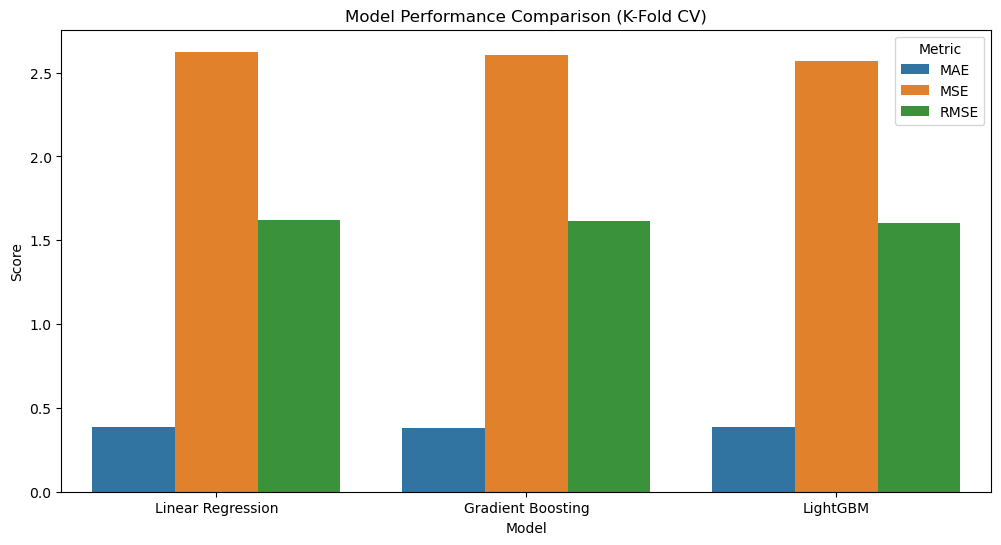

               Model       MAE       MSE      RMSE
0  Linear Regression  0.388524  2.624688  1.620089
1  Gradient Boosting  0.382701  2.605679  1.614212
2           LightGBM  0.385456  2.569986  1.603118


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

models = {
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled if name == "Linear Regression" else X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    mae = -np.mean(scores)
    
    scores_mse = cross_val_score(model, X_train_scaled if name == "Linear Regression" else X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mse = -np.mean(scores_mse)
    rmse = np.sqrt(mse)
    
    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse})

metrics_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score"), x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison (K-Fold CV)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()

metrics_df.to_csv("model_metrics.csv", index=False)

print(metrics_df)


In [26]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


X = df_sampled.drop(columns=['Delay'])
y = df_sampled['Delay']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_valid_scaled = scaler_X.transform(X_valid)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_valid_scaled = scaler_y.transform(y_valid.to_numpy().reshape(-1, 1)).flatten()


# RNN

In [30]:
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_valid_rnn = X_valid_scaled.reshape(X_valid_scaled.shape[0], 1, X_valid_scaled.shape[1])

model_rnn = Sequential([
    SimpleRNN(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dropout(0.3),
    BatchNormalization(),
    SimpleRNN(64, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    BatchNormalization(),
    SimpleRNN(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Dense(1)
])

model_rnn.summary()


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 1, 128)         │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 1, 64)          │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,817 (136.00 KB)

 Trainable params: 34,433 (134.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1.4499 - mae: 0.4268 - val_loss: 0.9659 - val_mae: 0.2560
Epoch 2/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1366 - mae: 0.2500 - val_loss: 0.9099 - val_mae: 0.2368
Epoch 3/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0875 - mae: 0.2421 - val_loss: 0.8757 - val_mae: 0.2416
Epoch 4/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.0120 - mae: 0.2402 - val_loss: 0.8630 - val_mae: 0.2357
Epoch 5/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.9423 - mae: 0.2363 - val_loss: 0.8601 - val_mae: 0.2316
Epoch 6/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.0170 - mae: 0.2398 - val_loss: 0.8591 - val_mae: 0.2341
Epoch 7/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.9513 - mae: 0.2370 - val_loss: 0.8589 - val_mae: 0.2345
Epoch 8/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.0632 - mae: 0.2408 - val_loss: 0.8584 - val_mae: 0.2300
Epoch 9/50
1730/1730 ━━━━━━━━━━━━━━━━━━━

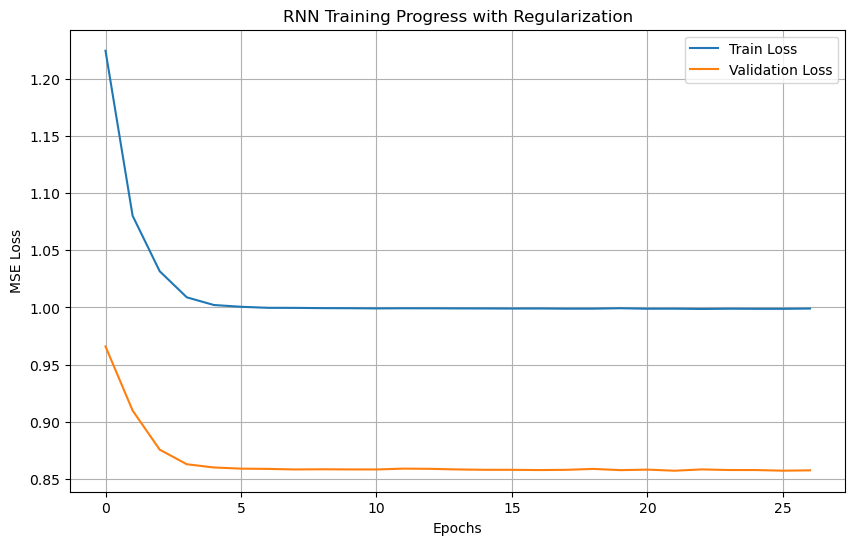

3459/3459 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Improved RNN Results:
- MAE: 0.3730
- MSE: 2.2481
- RMSE: 1.4994


In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_rnn.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model_rnn.fit(
    X_train_rnn, y_train_scaled,
    epochs=50,
    batch_size=256,
    verbose=1,
    validation_data=(X_valid_rnn, y_valid_scaled),
    callbacks=[early_stop]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN Training Progress with Regularization')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
plt.show()

rnn_preds_scaled = model_rnn.predict(X_valid_rnn).flatten()
rnn_preds_original = scaler_y.inverse_transform(rnn_preds_scaled.reshape(-1, 1)).flatten()
y_valid_original = scaler_y.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_valid_original, rnn_preds_original)
mse = mean_squared_error(y_valid_original, rnn_preds_original)
rmse = np.sqrt(mse)

print(f"Improved RNN Results:")
print(f"- MAE: {mae:.4f}")
print(f"- MSE: {mse:.4f}")
print(f"- RMSE: {rmse:.4f}")

rnn_metrics = {
    "Model": "RNN_Improved",
    "MAE": float(mae),
    "MSE": float(mse),
    "RMSE": float(rmse)
}

with open("rnn_improved_metrics.json", "w") as f:
    json.dump(rnn_metrics, f)


# ANN

In [36]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


model_ann = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1)
])


model_ann.summary()



C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 12,993 (50.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.6075 - mae: 0.5223 - val_loss: 0.9841 - val_mae: 0.2263
Epoch 2/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.1833 - mae: 0.2573 - val_loss: 0.9309 - val_mae: 0.2323
Epoch 3/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9726 - mae: 0.2388 - val_loss: 0.8838 - val_mae: 0.2316
Epoch 4/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9383 - mae: 0.2368 - val_loss: 0.8653 - val_mae: 0.2382
Epoch 5/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9750 - mae: 0.2395 - val_loss: 0.8613 - val_mae: 0.2345
Epoch 6/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0018 - mae: 0.2399 - val_loss: 0.8595 - val_mae: 0.2302
Epoch 7/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9623 - mae: 0.2377 - val_loss: 0.8599 - val_mae: 0.2325
Epoch 8/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.9076 - mae: 0.2365 - val_loss: 0.8595 - val_mae: 0.2327
Epoch 9/50
1730/1730 ━━━━━━━━━━━━━━━━━━━

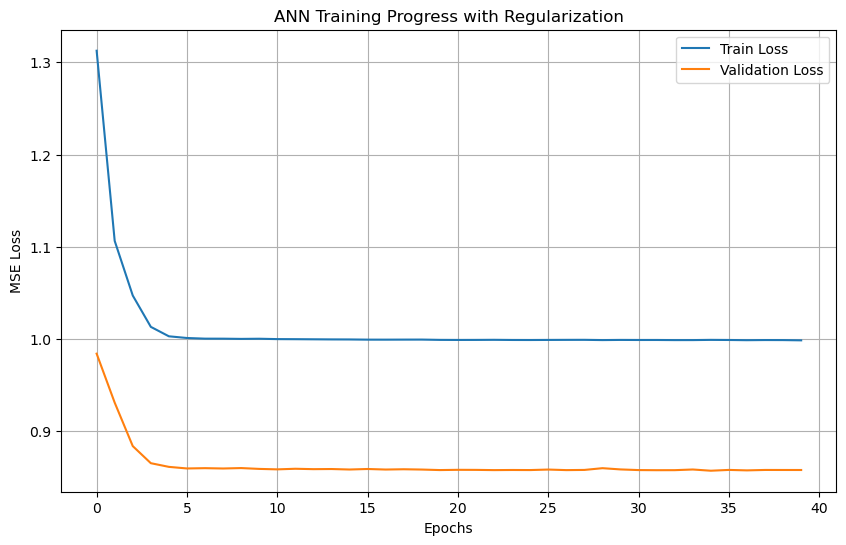

3459/3459 ━━━━━━━━━━━━━━━━━━━━ 3s 699us/step
Improved ANN Results:
- MAE: 0.3752
- MSE: 2.2477
- RMSE: 1.4992


In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_ann.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model_ann.fit(
    X_train_scaled, y_train_scaled,
    epochs=50,
    batch_size=256,
    verbose=1,
    validation_data=(X_valid_scaled, y_valid_scaled),
    callbacks=[early_stop]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Training Progress with Regularization')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
plt.show()

ann_preds_scaled = model_ann.predict(X_valid_scaled).flatten()
ann_preds_original = scaler_y.inverse_transform(ann_preds_scaled.reshape(-1, 1)).flatten()
y_valid_original = scaler_y.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_valid_original, ann_preds_original)
mse = mean_squared_error(y_valid_original, ann_preds_original)
rmse = np.sqrt(mse)

print(f"Improved ANN Results:")
print(f"- MAE: {mae:.4f}")
print(f"- MSE: {mse:.4f}")
print(f"- RMSE: {rmse:.4f}")

ann_metrics = {
    "Model": "ANN_Improved",
    "MAE": float(mae),
    "MSE": float(mse),
    "RMSE": float(rmse)
}

with open("ann_improved_metrics.json", "w") as f:
    json.dump(ann_metrics, f)


# GRU

In [43]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


X_train_gru = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_valid_gru = X_valid_scaled.reshape(X_valid_scaled.shape[0], 1, X_valid_scaled.shape[1])

model_gru = Sequential([
    GRU(128, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001), input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])),
    Dropout(0.3),
    BatchNormalization(),
    GRU(64, activation='relu', return_sequences=True, kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    BatchNormalization(),
    GRU(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    Dense(1)
])

model_gru.summary()



C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 128)         │        56,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 64)          │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,521 (404.38 KB)

 Trainable params: 103,137 (402.88 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 1.1446 - mae: 0.2777 - val_loss: 0.9085 - val_mae: 0.2380
Epoch 2/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 1.1023 - mae: 0.2438 - val_loss: 0.8742 - val_mae: 0.2302
Epoch 3/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.0287 - mae: 0.2396 - val_loss: 0.8637 - val_mae: 0.2404
Epoch 4/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.0878 - mae: 0.2435 - val_loss: 0.8599 - val_mae: 0.2309
Epoch 5/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.8662 - mae: 0.2349 - val_loss: 0.8597 - val_mae: 0.2300
Epoch 6/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.9314 - mae: 0.2362 - val_loss: 0.8593 - val_mae: 0.2348
Epoch 7/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.8835 - mae: 0.2351 - val_loss: 0.8588 - val_mae: 0.2349
Epoch 8/50
1730/1730 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.9986 - mae: 0.2376 - val_loss: 0.8585 - val_mae: 0.2389
Epoch 9/50
1730/1730 ━━━━━━━━━━━━━━━━━━

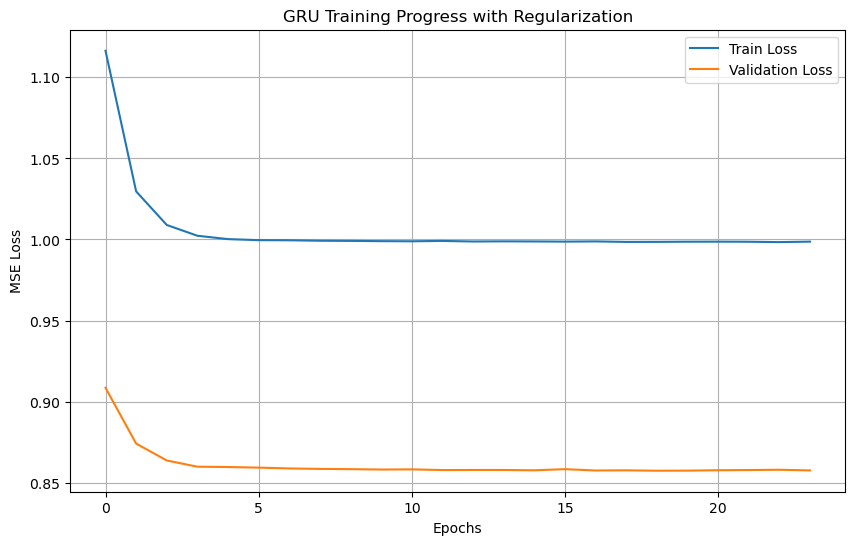

3459/3459 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Improved GRU Results:
- MAE: 0.3746
- MSE: 2.2487
- RMSE: 1.4996


In [45]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_gru.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model_gru.fit(
    X_train_gru, y_train_scaled,
    epochs=50,
    batch_size=256,
    verbose=1,
    validation_data=(X_valid_gru, y_valid_scaled),
    callbacks=[early_stop]
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Training Progress with Regularization')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
plt.show()

gru_preds_scaled = model_gru.predict(X_valid_gru).flatten()
gru_preds_original = scaler_y.inverse_transform(gru_preds_scaled.reshape(-1, 1)).flatten()
y_valid_original = scaler_y.inverse_transform(y_valid_scaled.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_valid_original, gru_preds_original)
mse = mean_squared_error(y_valid_original, gru_preds_original)
rmse = np.sqrt(mse)

print(f"Improved GRU Results:")
print(f"- MAE: {mae:.4f}")
print(f"- MSE: {mse:.4f}")
print(f"- RMSE: {rmse:.4f}")

gru_metrics = {
    "Model": "GRU_Improved",
    "MAE": float(mae),
    "MSE": float(mse),
    "RMSE": float(rmse)
}

with open("gru_improved_metrics.json", "w") as f:
    json.dump(gru_metrics, f)


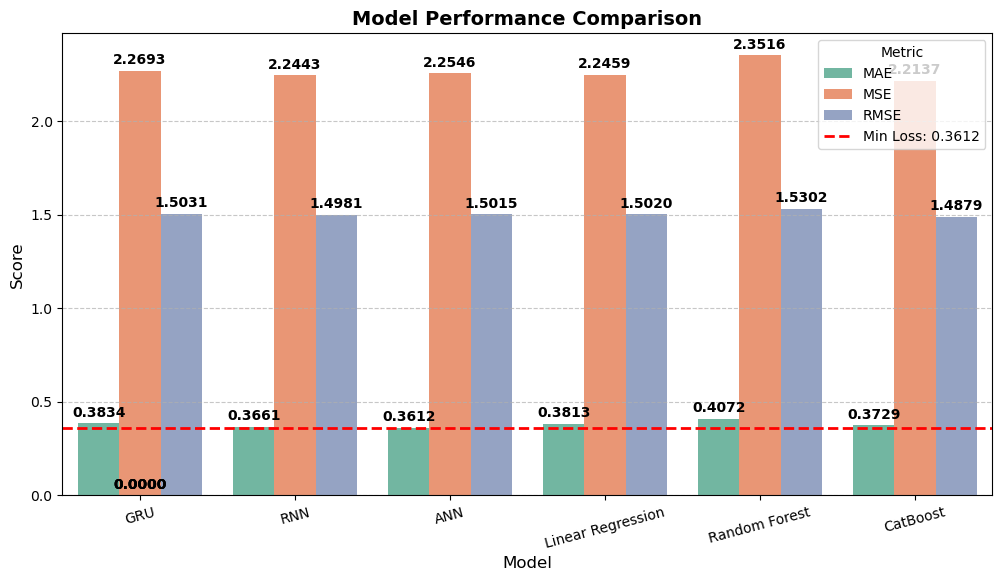


Model Performance Metrics:

            Model    MAE    MSE   RMSE
              GRU 0.3834 2.2693 1.5031
              RNN 0.3661 2.2443 1.4981
              ANN 0.3612 2.2546 1.5015
Linear Regression 0.3813 2.2459 1.5020
    Random Forest 0.4072 2.3516 1.5302
         CatBoost 0.3729 2.2137 1.4879


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = [
    {"Model": "GRU", "MAE": 0.3834, "MSE": 2.2693, "RMSE": 1.5031},
    {"Model": "RNN", "MAE": 0.3661, "MSE": 2.2443, "RMSE": 1.4981},
    {"Model": "ANN", "MAE": 0.3612, "MSE": 2.2546, "RMSE": 1.5015},
    {"Model": "Linear Regression", "MAE": 0.3813, "MSE": 2.2459, "RMSE": 1.5020},
    {"Model": "Random Forest", "MAE": 0.4072, "MSE": 2.3516, "RMSE": 1.5302},
    {"Model": "CatBoost", "MAE": 0.3729, "MSE": 2.2137, "RMSE": 1.4879},
]

metrics_df = pd.DataFrame(results)
min_loss = metrics_df[["MAE", "MSE", "RMSE"]].min().min()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score"),
                 x="Model", y="Score", hue="Metric", palette="Set2")

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, 
            p.get_height() + 0.02, 
            f'{p.get_height():.4f}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.axhline(y=min_loss, color='red', linestyle='--', linewidth=2, label=f"Min Loss: {min_loss:.4f}")

plt.title("Model Performance Comparison", fontsize=14, fontweight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=15)
plt.show()

metrics_df.to_csv("model_metrics.csv", index=False)

print("\nModel Performance Metrics:\n")
print(metrics_df.to_string(index=False))
